In [1]:
import pandas as pd

# (1)데이터 가져오기

In [2]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

# (2)datetime컬럼을 datetime자료형으로 변환하고 연,월,일,시,분,초까지6가지컬럼생성하기

In [4]:
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day'] = pd.to_datetime(df['datetime']).dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df['minute'] = pd.to_datetime(df['datetime']).dt.minute
df['second'] = pd.to_datetime(df['datetime']).dt.second
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  minute      10886 non-null  int64  
 17  second      10886 non-null  int64  
dtypes: float64(3), int64(14), object(1)
memory usage: 1.5+ MB


# (3)year,month,day,hour,minute,second데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

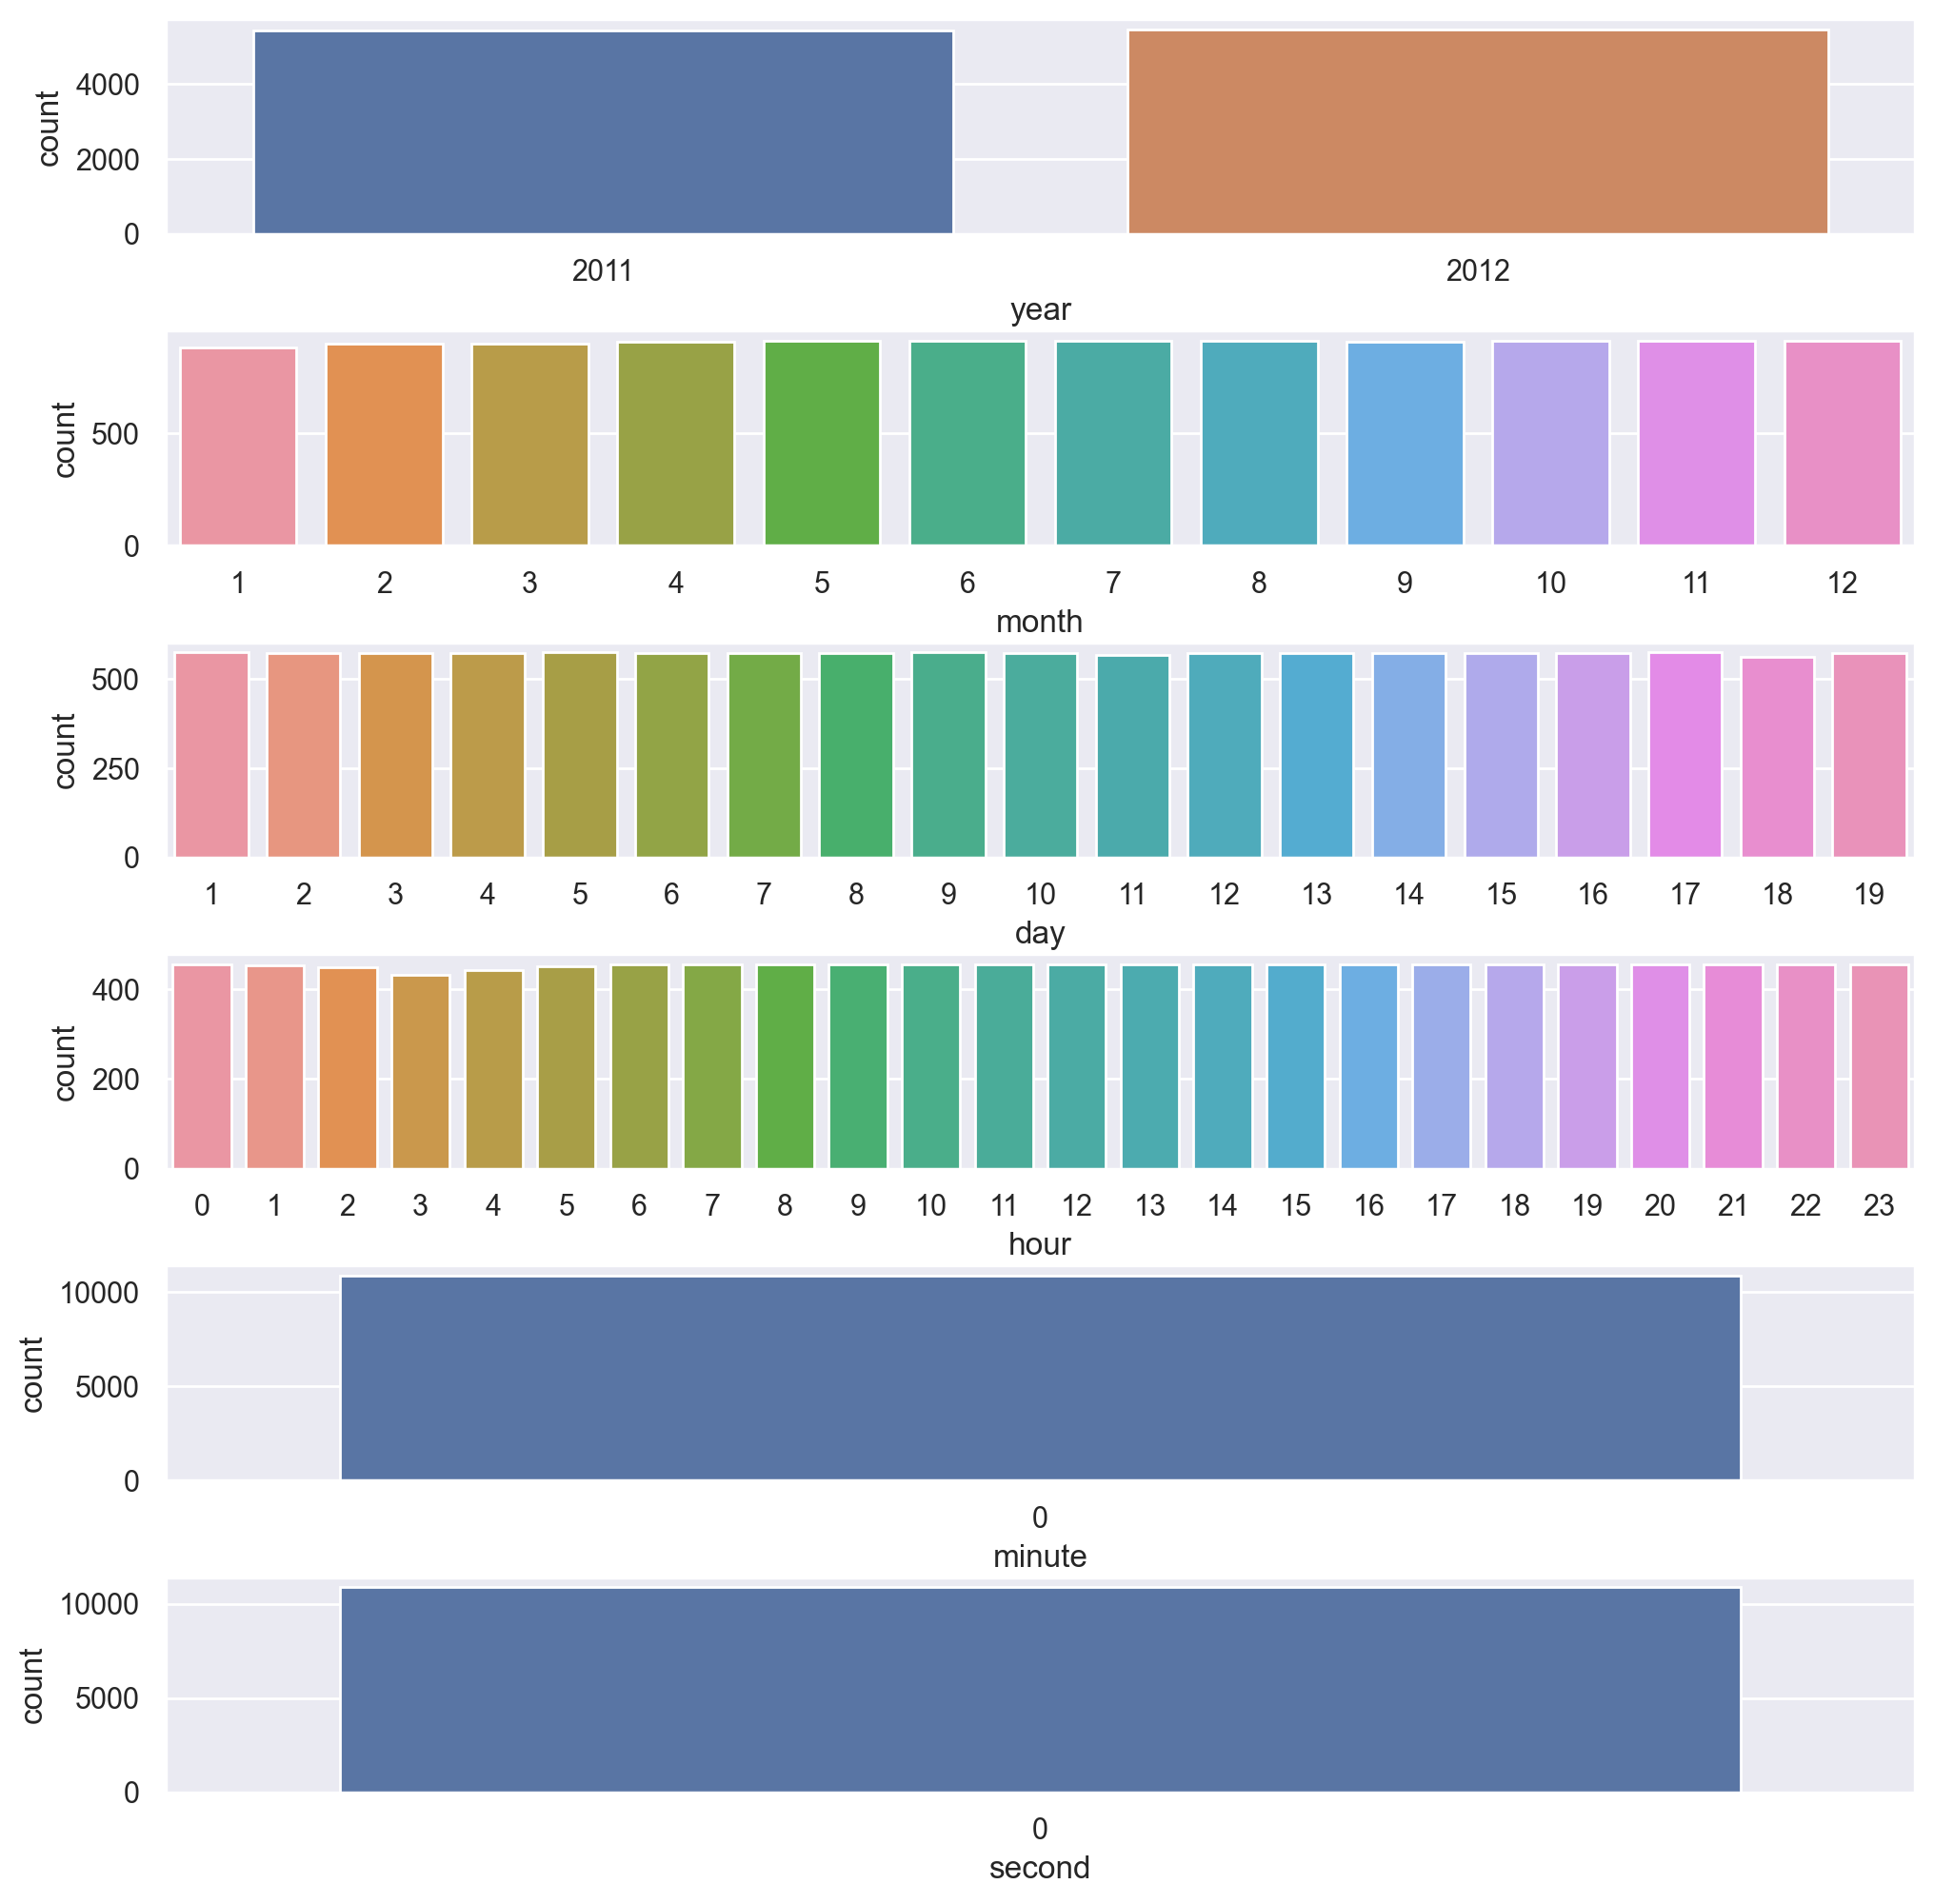

In [6]:
# sns.countplot활용해서 시각화하기
# subplot을 활용해서 한번에 6개의 그리프 함께 시각화하기
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
import seaborn as sns

sns.set()
fig, axes = plt.subplots(6,figsize=(10,10)) # 6행서브 플롯정의
fig.tight_layout()
sns.countplot(x='year',data=df, ax=axes[0])
sns.countplot(x='month',data=df, ax=axes[1])
sns.countplot(x='day',data=df, ax=axes[2])
sns.countplot(x='hour',data=df, ax=axes[3])
sns.countplot(x='minute',data=df, ax=axes[4])
sns.countplot(x='second',data=df, ax=axes[5])

# (4)X, y컬럼 선택 및 train/test데이터 분리

In [7]:
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다  
# 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 
# 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.
# ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
X = df[['year','month','day','hour','minute','second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']].values
X

array([[2.01100e+03, 1.00000e+00, 1.00000e+00, ..., 1.43950e+01,
        8.10000e+01, 0.00000e+00],
       [2.01100e+03, 1.00000e+00, 1.00000e+00, ..., 1.36350e+01,
        8.00000e+01, 0.00000e+00],
       [2.01100e+03, 1.00000e+00, 1.00000e+00, ..., 1.36350e+01,
        8.00000e+01, 0.00000e+00],
       ...,
       [2.01200e+03, 1.20000e+01, 1.90000e+01, ..., 1.59100e+01,
        6.10000e+01, 1.50013e+01],
       [2.01200e+03, 1.20000e+01, 1.90000e+01, ..., 1.74250e+01,
        6.10000e+01, 6.00320e+00],
       [2.01200e+03, 1.20000e+01, 1.90000e+01, ..., 1.66650e+01,
        6.60000e+01, 8.99810e+00]])

In [8]:
y = df[['count']].values
y

array([[ 16],
       [ 40],
       [ 32],
       ...,
       [168],
       [129],
       [ 88]], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708, 1)
(2178, 14) (2178, 1)


In [10]:
X_test

array([[2.0110e+03, 7.0000e+00, 1.9000e+01, ..., 4.0150e+01, 5.9000e+01,
        0.0000e+00],
       [2.0120e+03, 1.0000e+00, 1.6000e+01, ..., 6.8200e+00, 5.4000e+01,
        6.0032e+00],
       [2.0110e+03, 1.2000e+01, 1.1000e+01, ..., 1.1365e+01, 4.8000e+01,
        1.2998e+01],
       ...,
       [2.0120e+03, 1.1000e+01, 4.0000e+00, ..., 2.0455e+01, 4.0000e+01,
        1.2998e+01],
       [2.0120e+03, 1.0000e+00, 1.0000e+00, ..., 1.4395e+01, 8.1000e+01,
        7.0015e+00],
       [2.0120e+03, 5.0000e+00, 1.5000e+01, ..., 3.0305e+01, 7.3000e+01,
        1.2998e+01]])

# (5)LinearRegression 모델학습

In [11]:
# sklearn 의 LinearRegression모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# (6)학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [12]:
# 학습된 모델에 X_test를 입력해서 예측값 출력하기
predictions = model.predict(X_test)
predictions

array([[248.10627003],
       [ 48.79765547],
       [200.90676727],
       ...,
       [309.7528022 ],
       [ 38.17030198],
       [243.62697388]])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
import numpy as np

def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('root mean squared error', np.sqrt(mean_squared_error(y_true, y_pred))),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')

In [14]:
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
# mse 값과 함께 rmse 값도 계산하기
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
print('MSE = %0.4f' % (mse))
print('RMSE= %0.4f' % (np.sqrt(mse)))

MSE = 19945.3701
RMSE= 141.2281


In [15]:
regression_report(y_test,predictions)

Metrics for regression:
      mean absolute error:              105.342
    median absolute error:               82.609
       mean squared error:            19945.370
  root mean squared error:              141.228
                max error:              585.847
                 r2 score:                0.396
 explained variance score:                0.396

Percentiles:
                        5:             -180.878
                       25:              -92.514
                       50:              -24.205
                       75:               63.611
                       95:              282.334


# (7)x축은 temp또는 humidity로, y축은 count로 예측 결과 시각화하기

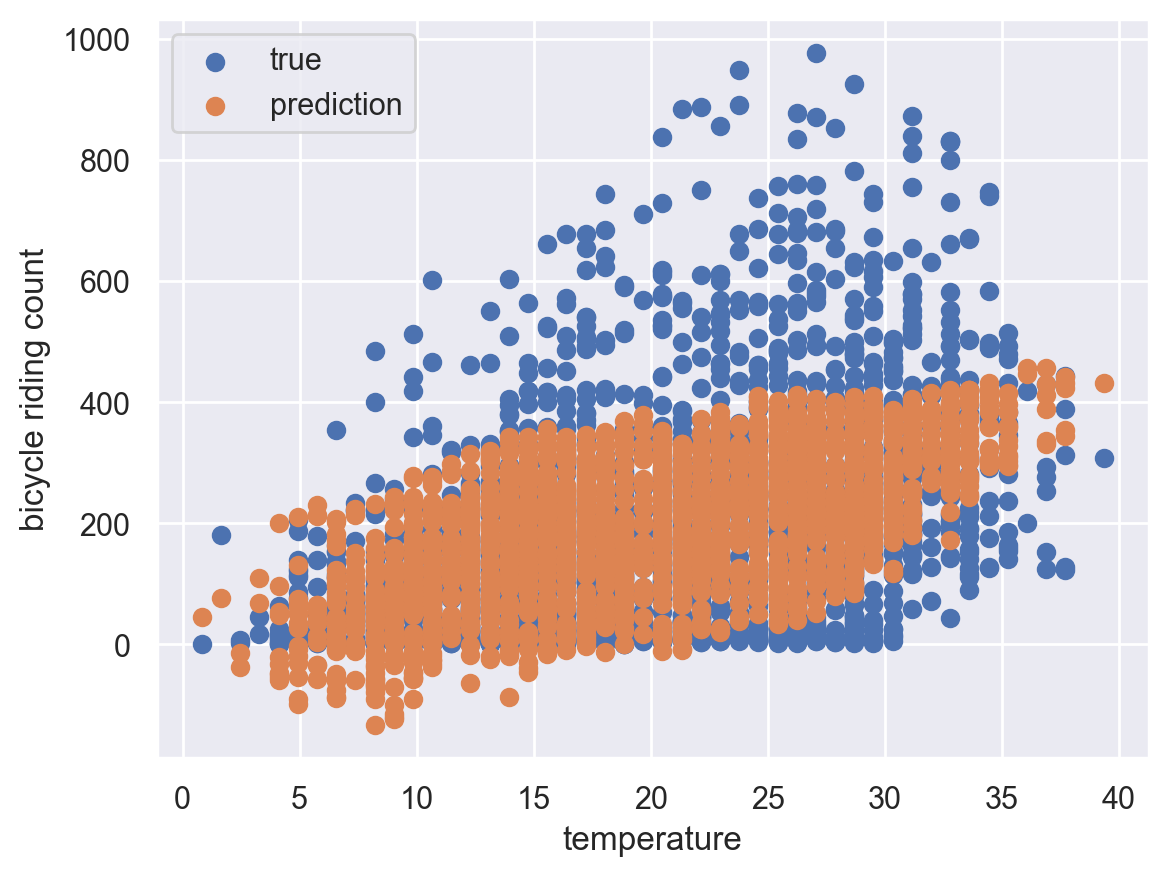

In [16]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 10], y_test, label="true")
plt.scatter(X_test[:, 10], predictions,label="prediction")
plt.legend()
plt.xlabel('temperature')
plt.ylabel('bicycle riding count')
plt.show()

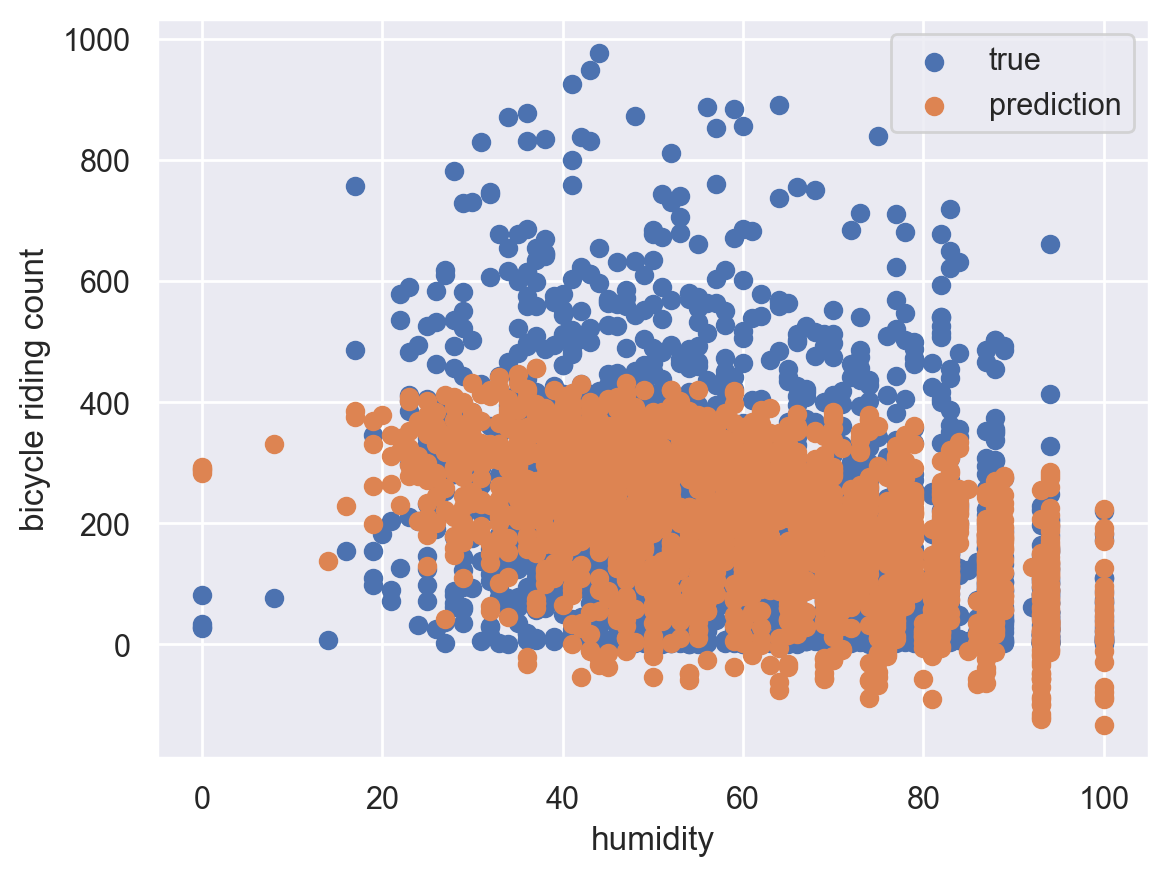

In [17]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 12], y_test, label="true")
plt.scatter(X_test[:, 12], predictions,label="prediction")
plt.legend()
plt.xlabel('humidity')
plt.ylabel('bicycle riding count')
plt.show()

# 회고  
## 어려웠던점  
 - 서브플롯 그릴때 아래쪽 래이블 글자가 겹쳐져서 깨지는 부분을 수정할때 인터넷검색을 많이 했습니다.  
## 알아낸점  
 - DataFrame에서 values로 numpy array로 변화될때 column값이 int와 float이 존재하는 경우  
  수용가능한 형태로(float) 자동변환되어 동일한 데이터 타입의 numpy array로 변환된다는내용  
## 아직모호한점  
 - 데이터를 scatter로 뿌려본 결과 humidity 예측값이 중앙에 수렴하고 있지 않은것 같아서 제대로 예측한것인지 의문이 드네요  
## 평가지표를 위해 시도한 것들  
 - DataFrame에서 불필요하다고 생각되는 부분을 제거하였습니다.  
## 자기다짐  